# Time Series Forescasting
In this notebook, we will be exploring prophet package from facebook to do time series analysis.
We will compare it with the ARIMA package

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

data = pd.read_csv('car-sales.csv')
data.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
## Demo showing how we can convert the Month column in the dataset to
## datetime column
newdate = '2016-01'
print(datetime.strptime(newdate,'%Y-%m'))

2016-01-01 00:00:00


In [5]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

# Applying parsr funtion to Month column or column with index 0.
sales = pd.read_csv('car-sales.csv',index_col=0, parse_dates=[0] ,
                    date_parser=parser)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


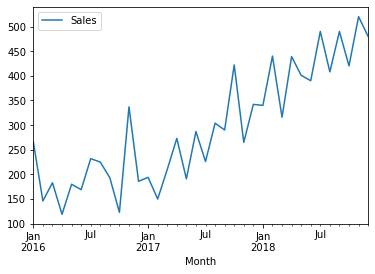

In [6]:
sales.plot()
plt.show()

Stationary means mean, variance and covariance is constant over periods.

## Checking Auto Colleration Function (ACF)

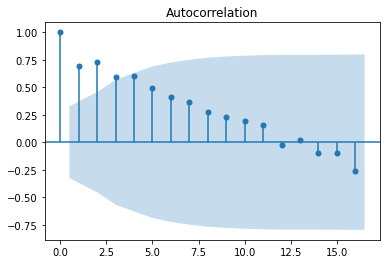

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
plt.show()

### Converting series to stationary

In [8]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [9]:
sales.shift(1).head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0


In [10]:
# Integrated of order 1, denoted by d (for diff),
# one of the parameter of ARIMA model

sales_diff = sales.diff(periods=1)

In [11]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [12]:
# Remove first element as after the shift with degree 1, it will be null
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


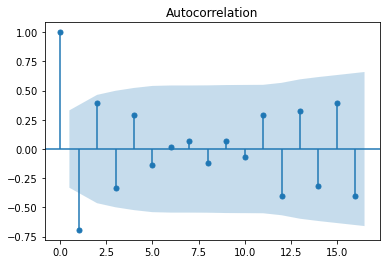

In [13]:
plot_acf(sales_diff)
plt.show()

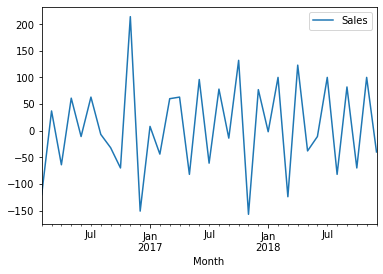

In [14]:
sales_diff.plot()
plt.show()

## Train-Test Split

In [15]:
X = sales.values.astype('float')
train = X[0:27] # 27 datapoints as train data
test = X[26:]  # 9 datapoints as test data
predictions = []

In [16]:
train.size, test.size

(27, 10)

# ARIMA model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
# p,d,q parameters
# p = periods taken for autoregressive model
# d = Integrated order, difference
# q = periods in moving average model
from sklearn.metrics import mean_squared_error

model_arima = ARIMA(train,order=(3,1,2))

model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

292.6686238694111


In [19]:
model_arima_fit.forecast(steps=10)[0]

array([383.93158433, 332.47741719, 419.91254528, 389.1778194 ,
       409.21403342, 373.91761013, 413.84904711, 423.08210462,
       443.47796856, 422.17597603])

In [20]:
predictions= model_arima_fit.forecast(steps=10)[0]
print(np.sqrt(mean_squared_error(test,predictions[0:10])))

62.46263593752656


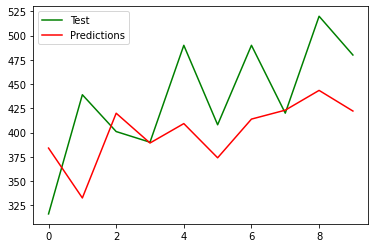

In [21]:
plt.plot(test, color='green', label='Test')
plt.plot(predictions,color='red', label='Predictions')
plt.legend()
plt.show()

# FB Prophet


In [22]:
# installing prophet
# !pip install prophet

In [23]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [24]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('car-sales.csv',index_col=0, parse_dates=[0] ,
                    date_parser=parser)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [25]:
# FB Prophet expect data and column names to be in certain format
date = list(sales.index)
sales = sales.Sales
dataFrame = pd.DataFrame(
    list(zip(date,sales)),
    columns = ['ds', 'y']
)

In [26]:
dataFrame.shape

(36, 2)

In [27]:
dataFrame.head()

,ds,y
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [28]:
dataTrain = dataFrame.iloc[0:30,:]
dataTest = dataFrame.iloc[30:,:]

In [29]:
print(dataTrain.shape, dataTest.shape)

(30, 2) (6, 2)


In [30]:
future = dataFrame[['ds']]

In [31]:
future.tail()

,ds
31,2018-08-01
32,2018-09-01
33,2018-10-01
34,2018-11-01
35,2018-12-01


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


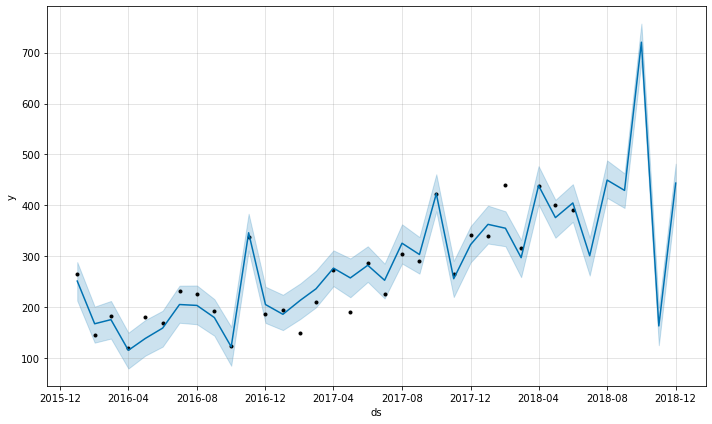

In [32]:
m = Prophet().fit(dataTrain)
fcst = m.predict(future)
fig = m.plot(fcst)

`Inference: ` Black dot represents the actual data and blue line reprsents the forecasted results.

In [33]:
# There are lot of different columns that Prophet package 
# tries to calculate while training
fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2018-08-01,427.754558,414.830801,488.333552,427.752570,427.756047,21.964323,21.964323,21.964323,21.964323,21.964323,21.964323,0.0,0.0,0.0,449.718881
32,2018-09-01,437.684601,394.843784,462.771821,437.680825,437.687563,-8.255008,-8.255008,-8.255008,-8.255008,-8.255008,-8.255008,0.0,0.0,0.0,429.429593
33,2018-10-01,447.294320,683.753467,757.089007,447.288162,447.299078,273.341179,273.341179,273.341179,273.341179,273.341179,273.341179,0.0,0.0,0.0,720.635499
34,2018-11-01,457.224363,125.141052,199.040942,457.215392,457.231361,-294.112746,-294.112746,-294.112746,-294.112746,-294.112746,-294.112746,0.0,0.0,0.0,163.111618
35,2018-12-01,466.834082,409.218816,481.912194,466.822591,466.843123,-23.117860,-23.117860,-23.117860,-23.117860,-23.117860,-23.117860,0.0,0.0,0.0,443.716223


In [34]:
dataTest.shape

(6, 2)

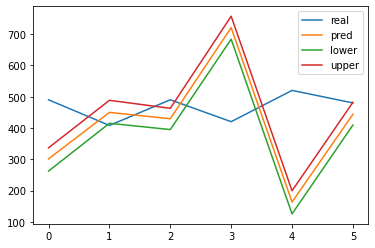

In [35]:
forecast_horizon = 6
plt.plot(dataTest.tail(forecast_horizon).y.values, label = 'real')
plt.plot(fcst['yhat'].tail(forecast_horizon).values, label = 'pred')
plt.plot(fcst['yhat_lower'].tail(forecast_horizon).values, label = 'lower')
plt.plot(fcst['yhat_upper'].tail(forecast_horizon).values, label = 'upper')
plt.legend()

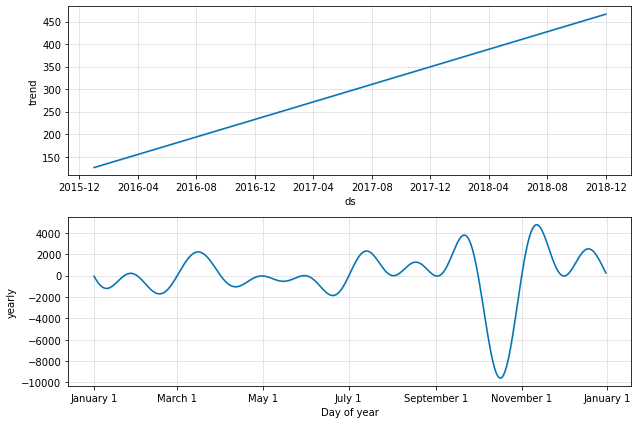

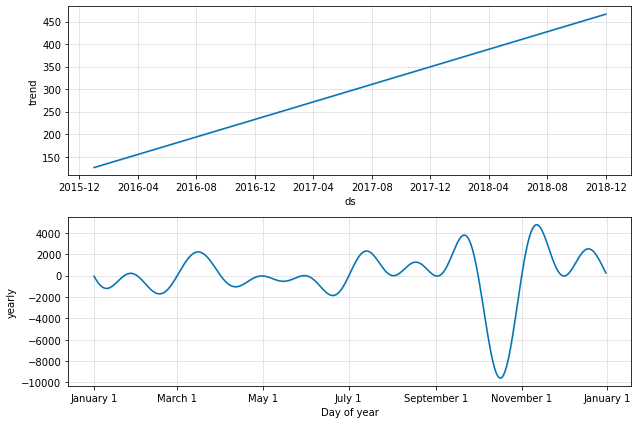

In [36]:
m.plot_components(fcst)